In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import os

# Load the dataset
file_path = os.path.join('..', 'data', 'ML471_S4_Datafile_Practice.csv')
df = pd.read_csv(file_path)

# Preprocessing
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.index.freq = 'ME' # Monthly end frequency

# Handle missing values in exogenous variables
# Using bfill to maintain the full range as seen in the sample plot
df = df.bfill()

df.head()

,Open,High,Low,Close,Volume,Close_diff,SMA_10,SMA_30,SES
Date,,,,,,,,,
2006-01-31,34.854000,35.166500,34.524500,34.818000,3777774.800,1.090947,35.646568,46.417628,34.818000
2006-02-28,35.901579,36.162105,35.671579,35.908947,4196577.053,1.090947,35.646568,46.417628,34.818000
2006-03-31,34.624783,34.889130,34.453478,34.671304,3952055.652,-1.237643,35.646568,46.417628,35.036189
2006-04-30,34.625263,34.901053,34.386316,34.687368,3888881.000,0.016064,35.646568,46.417628,34.963212
2006-05-31,34.499545,34.672273,34.185000,34.386818,4088439.591,-0.300550,35.646568,46.417628,34.908044


In [2]:
# Define Target and Exogenous variables
target = df['Close']
exog = df[['SMA_10', 'SMA_30', 'SES']]

# Split into Train and Test (last 24 months as test)
train_target = target.iloc[:-24]
test_target = target.iloc[-24:]
train_exog = exog.iloc[:-24]
test_exog = exog.iloc[-24:]

# Train SARIMAX model
order = (1, 0, 1)
seasonal_order = (3, 1, 1, 12)

model = SARIMAX(train_target, 
                exog=train_exog, 
                order=order, 
                seasonal_order=seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  108
Model:             SARIMAX(1, 0, 1)x(3, 1, 1, 12)   Log Likelihood                -125.022
Date:                            Mon, 02 Feb 2026   AIC                            270.044
Time:                                    10:25:31   BIC                            290.819
Sample:                                01-31-2006   HQIC                           278.154
                                     - 12-31-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
SMA_10         3.5400      0.872      4.061      0.000       1.832       5.248
SMA_30         0.2274      0.874   

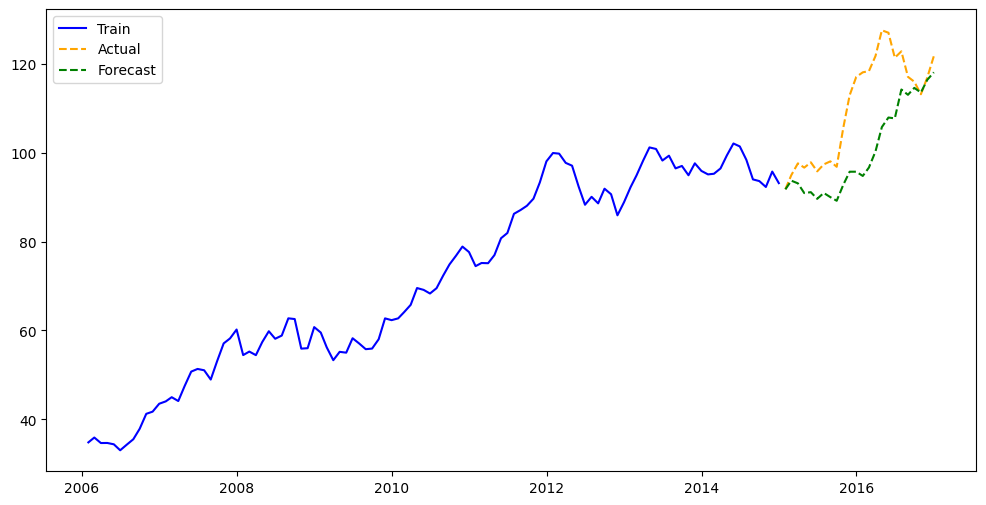

In [3]:
# Forecast
forecast = results.get_forecast(steps=24, exog=test_exog).predicted_mean

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train_target.index, train_target, label='Train', color='blue')
plt.plot(test_target.index, test_target, label='Actual', color='orange', linestyle='--')
plt.plot(test_target.index, forecast, label='Forecast', color='green', linestyle='--')

plt.legend(loc='upper left')
plt.grid(False) # Sample plot doesn't seem to have prominent grid
plt.show()